<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '>Business Understanding  
- [<font color='#000000'>Introduction </font>](#first-bullet)<br>   
- [<font color='#000000'>Objective of the Project</font>](#second-bullet)<br> 
   
### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 
- [<font color='#000000'>Import and Transform the format of Data</font>](#fourth-bullet)<br>
- [<font color='#000000'>CRISP-DM Methodology - Cross Industry Standard Process for Data Mining </font>](#sixth-bullet)<br>

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
- [<font color='#000000'>Outlier Detection and Treatment</font>](#thirteenth-bullet)<br>  
- [<font color='#000000'>Create new Features</font>](#eighteenth-bullet)<br>   
- [<font color='#000000'>One-Hot Encoding for Non-metric Features</font>](#nineteenth-bullet)<br>  
- [<font color='#000000'>Variables Distribution after the treatments</font>](#twelfth-bullet)<br>   
- [<font color='#000000'>Normalization</font>](#seventeenth-bullet)<br> 
- [<font color='#000000'>Separating Feature and Label variables</font>](#nineteen-bullet)<br>      
- [<font color='#000000'>Random Oversampling of Minority Class</font>](#fourteenth-bullet)<br>  
- [<font color='#000000'>Feature Selection</font>](#sixteenth-bullet)<br> 
- [<font color='#000000'>Final Selected Features</font>](#twentieth-bullet)<br>  
- [<font color='#000000'>TimeSeriesSplit</font>](#fortythird-bullet)<br> 
    
   
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Decision Tree</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Random Forest</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Logistic Regression</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Support Vector Classification</font>](#twentysixth-bullet)<br>   
- [<font color='#000000'>Model Selection</font>](#twentyseventh-bullet)<br> 
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Remember: library imports are ALWAYS at the top of the script, no exceptions!
# import sqlite3
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# from math import ceil
# import matplotlib.cm as cm
# import joblib
# import random
# from collections import Counter
# import datetime

# from collections import Counter
# from sklearn.preprocessing import StandardScaler

# #  RFE and Models
# # explore the number of selected features for RFE
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot
# # report which features were selected by RFE
# from sklearn.datasets import make_classification
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# import sklearn
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.linear_model import LassoCV
# from sklearn import preprocessing
# from sklearn.preprocessing import RobustScaler
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.model_selection import KFold
# from sklearn.model_selection import RepeatedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score 
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.svm import SVC
# from sklearn import metrics
# from sklearn.model_selection import StratifiedKFold

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_AVAX.csv')
df

,Date,AVAX-USD_ADJCLOSE,AVAX-USD_CLOSE,AVAX-USD_HIGH,AVAX-USD_LOW,AVAX-USD_OPEN,AVAX-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,75.080742,75.080742,80.008301,74.412254,78.268646,569385150.0
1822,2022-04-22,74.122963,74.122963,77.152420,73.490158,75.084648,532238762.0
1823,2022-04-23,72.920013,72.920013,74.369293,72.632584,74.127480,360787956.0
1824,2022-04-24,71.603035,71.603035,73.437004,71.342026,72.892731,320340266.0


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1826 non-null   object 
 1   AVAX-USD_ADJCLOSE  583 non-null    float64
 2   AVAX-USD_CLOSE     583 non-null    float64
 3   AVAX-USD_HIGH      583 non-null    float64
 4   AVAX-USD_LOW       583 non-null    float64
 5   AVAX-USD_OPEN      583 non-null    float64
 6   AVAX-USD_VOLUME    583 non-null    float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
AVAX-USD_ADJCLOSE,1243
AVAX-USD_CLOSE,1243
AVAX-USD_HIGH,1243
AVAX-USD_LOW,1243
AVAX-USD_OPEN,1243
AVAX-USD_VOLUME,1243


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AVAX-USD_ADJCLOSE,583.0,4.306912e+01,3.520897e+01,2.906161,1.182176e+01,3.189084e+01,7.417818e+01,1.345310e+02
AVAX-USD_CLOSE,583.0,4.306912e+01,3.520897e+01,2.906161,1.182176e+01,3.189084e+01,7.417818e+01,1.345310e+02
AVAX-USD_HIGH,583.0,4.550467e+01,3.691926e+01,2.939915,1.243437e+01,3.469755e+01,7.804176e+01,1.462179e+02
AVAX-USD_LOW,583.0,4.066852e+01,3.358998e+01,2.788822,1.111544e+01,2.999939e+01,7.174134e+01,1.261926e+02
AVAX-USD_OPEN,583.0,4.294390e+01,3.520388e+01,2.905293,1.179604e+01,3.179400e+01,7.414628e+01,1.348656e+02
AVAX-USD_VOLUME,583.0,6.225375e+08,6.693453e+08,3957.000000,7.044088e+07,3.689774e+08,1.009783e+09,3.379296e+09


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,AVAX-USD_ADJCLOSE,AVAX-USD_CLOSE,AVAX-USD_HIGH,AVAX-USD_LOW,AVAX-USD_OPEN,AVAX-USD_VOLUME
307,2018-02-27,NaN,NaN,NaN,NaN,NaN,NaN
1357,2021-01-12,7.782700,7.782700,8.198621,6.457987,6.487615,157738757.0
1052,2020-03-13,NaN,NaN,NaN,NaN,NaN,NaN
190,2017-11-02,NaN,NaN,NaN,NaN,NaN,NaN
1153,2020-06-22,NaN,NaN,NaN,NaN,NaN,NaN
872,2019-09-15,NaN,NaN,NaN,NaN,NaN,NaN
1303,2020-11-19,3.627004,3.627004,3.816442,3.570697,3.748681,21489339.0
1623,2021-10-05,64.650116,64.650116,66.719330,62.942802,65.247177,813159957.0
565,2018-11-12,NaN,NaN,NaN,NaN,NaN,NaN
666,2019-02-21,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,AVAX-USD_ADJCLOSE,AVAX-USD_CLOSE,AVAX-USD_HIGH,AVAX-USD_LOW,AVAX-USD_OPEN,AVAX-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1240,2020-09-17,NaN,NaN,NaN,NaN,NaN,NaN
1241,2020-09-18,NaN,NaN,NaN,NaN,NaN,NaN
1242,2020-09-19,NaN,NaN,NaN,NaN,NaN,NaN
1243,2020-09-20,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,AVAX-USD_ADJCLOSE,AVAX-USD_CLOSE,AVAX-USD_HIGH,AVAX-USD_LOW,AVAX-USD_OPEN,AVAX-USD_VOLUME
0,2020-07-13,4.896294,4.896294,4.915115,4.481499,4.613968,28340.0
1,2020-07-14,4.986754,4.986754,5.229564,4.762068,4.909865,3957.0
2,2020-09-22,5.234632,5.234632,11.463443,4.125380,4.986754,288098840.0
3,2020-09-23,4.118469,4.118469,5.329310,3.982604,5.321654,173091214.0
4,2020-09-24,4.566561,4.566561,4.751878,3.539887,3.817925,96110964.0
...,...,...,...,...,...,...,...
578,2022-04-21,75.080742,75.080742,80.008301,74.412254,78.268646,569385150.0
579,2022-04-22,74.122963,74.122963,77.152420,73.490158,75.084648,532238762.0
580,2022-04-23,72.920013,72.920013,74.369293,72.632584,74.127480,360787956.0
581,2022-04-24,71.603035,71.603035,73.437004,71.342026,72.892731,320340266.0


#### __`Observations`__

- The Dataset presents __25902 duplicated records__ and  __missing values in the features “Children” and “Country”__. That may occur because it is common for hotels not to know this kind of information until the moment of check-in;


- Analyzing the Descriptive Statistics, , we found out  odd values in the variable “ADR” that stands for Average Daily Rate and the minimum value present in the distribution is 0. We noticed that a Coherence Check will be needed in the next phase;


- Looking at min, max, mean and 75% values of some variables like "ADR", "StaysInWeekendNights" and “StaysInWeekNights" we could conclude that an outlier treatment will be needed in the next phase.

# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,AVAX-USD_ADJCLOSE,AVAX-USD_CLOSE,AVAX-USD_HIGH,AVAX-USD_LOW,AVAX-USD_OPEN,AVAX-USD_VOLUME
0,2020-07-13,4.896294,4.896294,4.915115,4.481499,4.613968,28340.0
1,2020-07-14,4.986754,4.986754,5.229564,4.762068,4.909865,3957.0
2,2020-09-22,5.234632,5.234632,11.463443,4.125380,4.986754,288098840.0
3,2020-09-23,4.118469,4.118469,5.329310,3.982604,5.321654,173091214.0
4,2020-09-24,4.566561,4.566561,4.751878,3.539887,3.817925,96110964.0
...,...,...,...,...,...,...,...
578,2022-04-21,75.080742,75.080742,80.008301,74.412254,78.268646,569385150.0
579,2022-04-22,74.122963,74.122963,77.152420,73.490158,75.084648,532238762.0
580,2022-04-23,72.920013,72.920013,74.369293,72.632584,74.127480,360787956.0
581,2022-04-24,71.603035,71.603035,73.437004,71.342026,72.892731,320340266.0


 __`Drop first two rows due to temporal disparity`__

In [11]:
df.drop([0, 1], inplace=True)
df.reset_index(inplace=True, drop=True)
df

,Date,AVAX-USD_ADJCLOSE,AVAX-USD_CLOSE,AVAX-USD_HIGH,AVAX-USD_LOW,AVAX-USD_OPEN,AVAX-USD_VOLUME
0,2020-09-22,5.234632,5.234632,11.463443,4.125380,4.986754,288098840.0
1,2020-09-23,4.118469,4.118469,5.329310,3.982604,5.321654,173091214.0
2,2020-09-24,4.566561,4.566561,4.751878,3.539887,3.817925,96110964.0
3,2020-09-25,4.712279,4.712279,4.958673,4.240798,4.614028,55854397.0
4,2020-09-26,4.539249,4.539249,4.817752,4.376774,4.713736,27304546.0
...,...,...,...,...,...,...,...
576,2022-04-21,75.080742,75.080742,80.008301,74.412254,78.268646,569385150.0
577,2022-04-22,74.122963,74.122963,77.152420,73.490158,75.084648,532238762.0
578,2022-04-23,72.920013,72.920013,74.369293,72.632584,74.127480,360787956.0
579,2022-04-24,71.603035,71.603035,73.437004,71.342026,72.892731,320340266.0


 __`Get percentual difference between open and close values and low and high values`__

In [12]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[3]])*100
df.head()

,Date,AVAX-USD_ADJCLOSE,AVAX-USD_CLOSE,AVAX-USD_HIGH,AVAX-USD_LOW,AVAX-USD_OPEN,AVAX-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2020-09-22,5.234632,5.234632,11.463443,4.125380,4.986754,288098840.0,4.735349,64.012731
1,2020-09-23,4.118469,4.118469,5.329310,3.982604,5.321654,173091214.0,29.214364,25.269799
2,2020-09-24,4.566561,4.566561,4.751878,3.539887,3.817925,96110964.0,16.393873,25.505514
3,2020-09-25,4.712279,4.712279,4.958673,4.240798,4.614028,55854397.0,2.084997,14.477160
4,2020-09-26,4.539249,4.539249,4.817752,4.376774,4.713736,27304546.0,3.843964,9.153191


In [13]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')

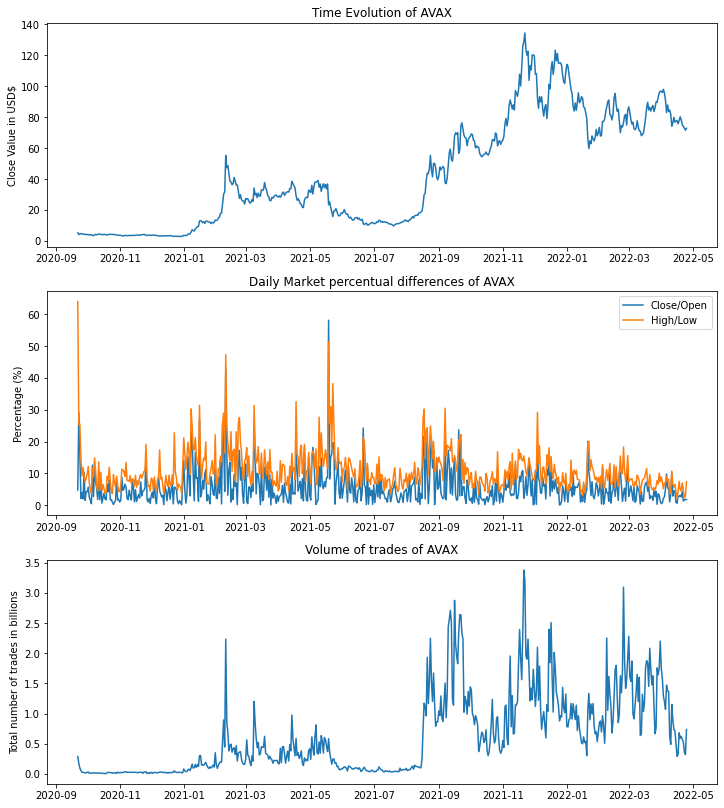

In [14]:
plot_coinValue(df)